    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

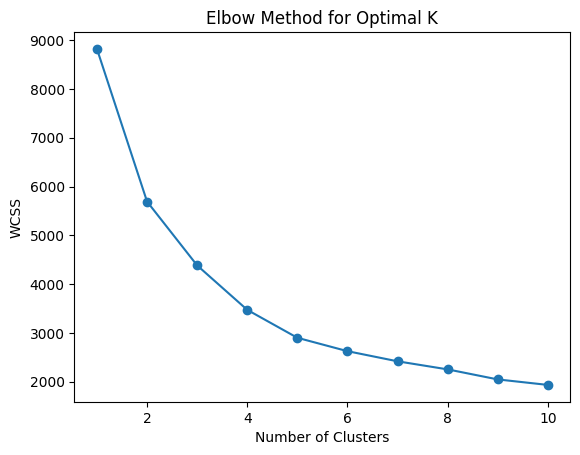

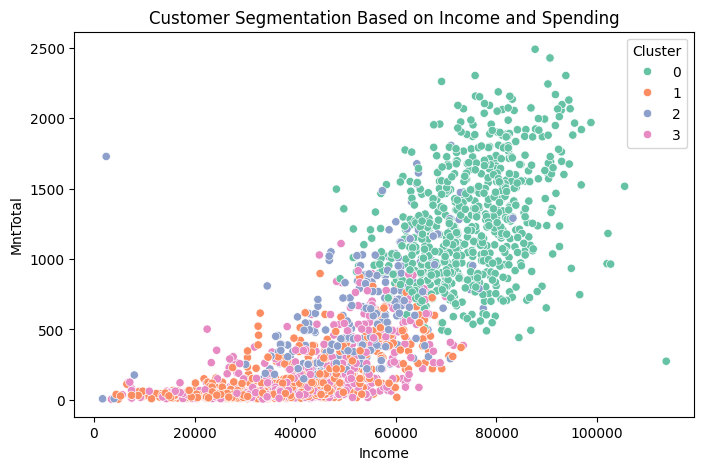

               Income    Recency     MntTotal  NumDealsPurchases
Cluster                                                         
0        74689.746439  49.502849  1255.131054           1.403134
1        37040.101852  24.760802   141.734568           1.944444
2        53350.450549  45.963370   610.142857           6.131868
3        39223.123711  76.840206   174.194158           2.049828


In [2]:
# ===============================
# Customer Segmentation Analysis
# ===============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Load Dataset
df = pd.read_csv("ifood_df.csv")

print(df.head())
print(df.info())

# 3. Select Features for Clustering
X = df[['Income', 'Recency', 'MntTotal', 'NumDealsPurchases']]

# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Elbow Method to Find Optimal Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

# 6. Apply K-Means (k = 4 is optimal)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['Income'],
    y=df['MntTotal'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("Customer Segmentation Based on Income and Spending")
plt.show()

# 8. Cluster Summary
cluster_summary = df.groupby('Cluster')[['Income', 'Recency', 'MntTotal', 'NumDealsPurchases']].mean()
print(cluster_summary)
